In [3]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
from   statsmodels.tsa.seasonal import seasonal_decompose

In [4]:

file_id = "17iCHWJF4gU0litHn0ZGnKS8hbTsOXE39"
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

TabData  = pd.read_csv(download_url,sep="\t")
TabData.head()


,FECHA,Unnamed: 1,PRECIP,EVAP,TMAX,TMIN
0,1966-03-01,0,NULO,23,3,NaN
1,1966-03-02,0,NULO,24,10,NaN
2,1966-03-03,0,NULO,24,9,NaN
3,1966-03-04,0,NULO,19,12,NaN
4,1966-03-05,0,NULO,19.5,5,NaN


In [9]:
TabData.columns = ["Fecha", "Nada", "Prec", "Evap", "TMax", "TMin"]
TabData.head()

,Fecha,Nada,Prec,Evap,TMax,TMin
0,1966-03-01,0,NULO,23,3,NaN
1,1966-03-02,0,NULO,24,10,NaN
2,1966-03-03,0,NULO,24,9,NaN
3,1966-03-04,0,NULO,19,12,NaN
4,1966-03-05,0,NULO,19.5,5,NaN


In [10]:
TabData["Fecha"] = pd.to_datetime(TabData["Fecha"])
TabData.set_index("Fecha")

,Nada,Prec,Evap,TMax,TMin
Fecha,,,,,
1966-03-01,0,NULO,23,3,NaN
1966-03-02,0,NULO,24,10,NaN
1966-03-03,0,NULO,24,9,NaN
1966-03-04,0,NULO,19,12,NaN
1966-03-05,0,NULO,19.5,5,NaN
...,...,...,...,...,...
2024-08-27,0,5.88,27.4,11.3,NaN
2024-08-28,0,3.85,29,12.6,NaN
2024-08-29,0,4,30,14,NaN


In [16]:
TabTmax = TabData.drop(columns=["Nada", "Prec", "Evap", "TMin"], axis=1)
TabTmax.head()

,Fecha,TMax
0,1966-03-01,3
1,1966-03-02,10
2,1966-03-03,9
3,1966-03-04,12
4,1966-03-05,5


In [19]:
TabTmax.TMax = TabData.TMax.replace('NULO', np.nan).astype(float)
TabTmax.dropna

<bound method DataFrame.dropna of            Fecha  TMax
0     1966-03-01   3.0
1     1966-03-02  10.0
2     1966-03-03   9.0
3     1966-03-04  12.0
4     1966-03-05   5.0
...          ...   ...
15699 2024-08-27  11.3
15700 2024-08-28  12.6
15701 2024-08-29  14.0
15702 2024-08-30  14.5
15703 2024-08-31  13.2

[15704 rows x 2 columns]>

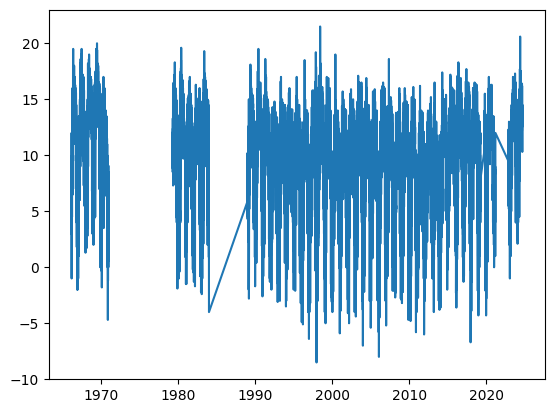

In [20]:
plt.plot(TabData.Fecha, TabTmax.TMax)

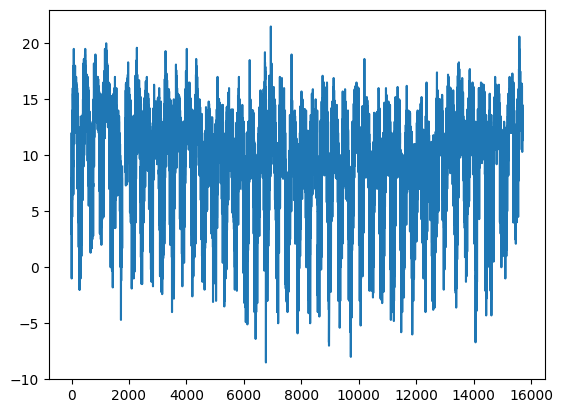

,Fecha,TMax
12053,2012-06-01,14.0
12054,2012-06-02,12.0
12055,2012-06-03,7.8
12056,2012-06-04,7.0
12057,2012-06-05,10.0


In [ ]:
TabTmax.set_index("Fecha")
plt.plot(TabTmax.index, TabTmax.TMax)
plt.show()


In [23]:
from datetime import datetime, timedelta
year = 2012
fch_ini = datetime.strptime("2012-06-01", "%Y-%m-%d")
fch_fin = datetime.strptime("2012-07-31", "%Y-%m-%d")

print(fch_ini, fch_fin)

2012-06-01 00:00:00 2012-07-31 00:00:00


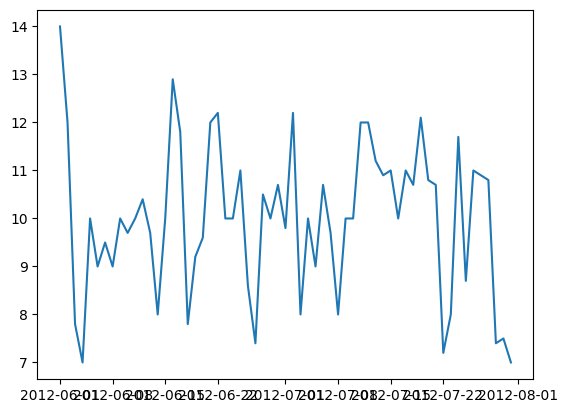

In [29]:
Datos = TabTmax[(TabTmax['Fecha'] >= fch_ini) & (TabTmax['Fecha'] <= fch_fin)]
plt.plot(Datos["Fecha"], Datos["TMax"])


In [32]:

Datos.head()

,Fecha,TMax
12053,2012-06-01,14.0
12054,2012-06-02,12.0
12055,2012-06-03,7.8
12056,2012-06-04,7.0
12057,2012-06-05,10.0


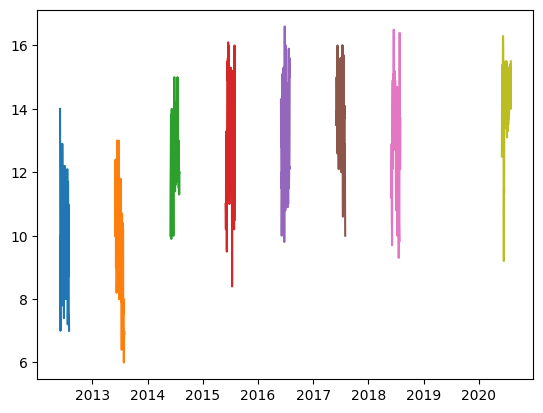

In [43]:
TempJJ = []
for year in range(2012, 2023):
    fch_ini = datetime.strptime(f"{year}-06-01", "%Y-%m-%d")
    fch_fin = datetime.strptime(f"{year}-07-31", "%Y-%m-%d")
    Datos = TabTmax[(TabTmax['Fecha'] >= fch_ini) & (TabTmax['Fecha'] <= fch_fin)]
    TempJJ.append(np.asarray(Datos))
    plt.plot(Datos["Fecha"], Datos["TMax"], label=year)